In [68]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [69]:
import yfinance as yf

start = '2013-11-01'
end = '2023-12-12'
df = yf.download('AAPL', start=start, end=end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-11-01,18.715000,18.742857,18.422857,18.572500,16.187845,274890000
2013-11-04,18.610714,18.815001,18.528929,18.812500,16.397026,244627600
2013-11-05,18.735001,18.888929,18.678572,18.766071,16.356564,265213200
2013-11-06,18.719643,18.745001,18.507143,18.604286,16.310219,223375600
2013-11-07,18.556429,18.685356,18.299286,18.303213,16.046276,262620400


In [70]:
df.tail()


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-05,190.210007,194.399994,190.179993,193.419998,193.419998,66628400
2023-12-06,194.449997,194.759995,192.110001,192.320007,192.320007,41089700
2023-12-07,193.630005,195.000000,193.589996,194.270004,194.270004,47477700
2023-12-08,194.199997,195.990005,193.669998,195.710007,195.710007,53377300
2023-12-11,193.110001,193.490005,191.419998,193.179993,193.179993,60943700


In [71]:
df= df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-01,18.715000,18.742857,18.422857,18.572500,16.187845,274890000
1,2013-11-04,18.610714,18.815001,18.528929,18.812500,16.397026,244627600
2,2013-11-05,18.735001,18.888929,18.678572,18.766071,16.356564,265213200
3,2013-11-06,18.719643,18.745001,18.507143,18.604286,16.310219,223375600
4,2013-11-07,18.556429,18.685356,18.299286,18.303213,16.046276,262620400


In [72]:
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()


,Open,High,Low,Close,Volume
0,18.715000,18.742857,18.422857,18.572500,274890000
1,18.610714,18.815001,18.528929,18.812500,244627600
2,18.735001,18.888929,18.678572,18.766071,265213200
3,18.719643,18.745001,18.507143,18.604286,223375600
4,18.556429,18.685356,18.299286,18.303213,262620400


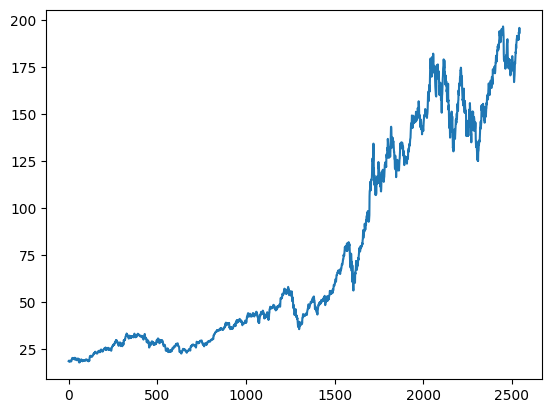

In [73]:
plt.plot(df.Close)

In [74]:
df

,Open,High,Low,Close,Volume
0,18.715000,18.742857,18.422857,18.572500,274890000
1,18.610714,18.815001,18.528929,18.812500,244627600
2,18.735001,18.888929,18.678572,18.766071,265213200
3,18.719643,18.745001,18.507143,18.604286,223375600
4,18.556429,18.685356,18.299286,18.303213,262620400
...,...,...,...,...,...
2539,190.210007,194.399994,190.179993,193.419998,66628400
2540,194.449997,194.759995,192.110001,192.320007,41089700
2541,193.630005,195.000000,193.589996,194.270004,47477700
2542,194.199997,195.990005,193.669998,195.710007,53377300


In [75]:
ma100 = df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2539    181.595101
2540    181.578401
2541    181.583801
2542    181.589901
2543    181.590401
Name: Close, Length: 2544, dtype: float64

In [76]:
ma200 = df.Close.rolling(200).mean()
ma200 

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2539    175.65010
2540    175.86930
2541    176.09610
2542    176.32765
2543    176.56000
Name: Close, Length: 2544, dtype: float64

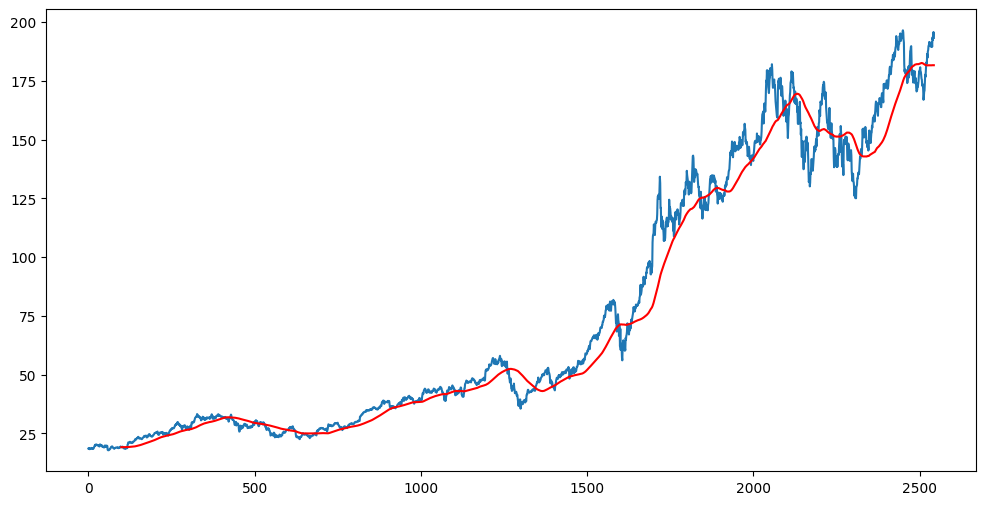

In [77]:
plt. figure (figsize = (12,6))
plt.plot(df.Close)
plt.plot (ma100, 'r')

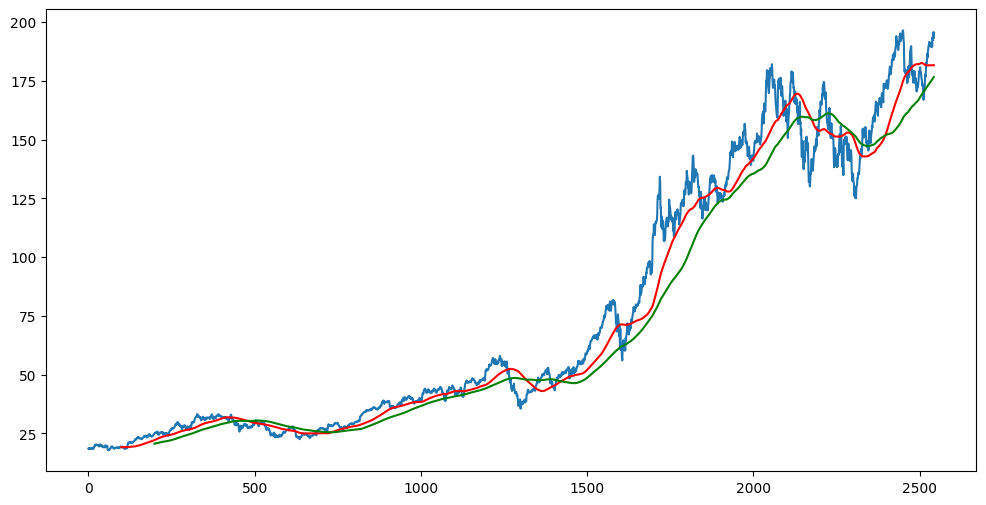

In [78]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)

plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [79]:
df.shape

(2544, 5)

In [80]:
# Splitting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print (data_testing.shape)

(1780, 1)
(764, 1)


In [81]:
data_training.head()

,Close
0,18.572500
1,18.812500
2,18.766071
3,18.604286
4,18.303213


In [82]:
data_testing.head()

,Close
1780,116.589996
1781,119.050003
1782,122.720001
1783,123.080002
1784,122.940002


In [83]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [84]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.00621689],
       [0.00827997],
       [0.00788086],
       ...,
       [0.82523966],
       [0.83658662],
       [0.84397934]])

In [85]:
data_training_array.shape

(1780, 1)

In [86]:
x_train= []
y_train= []

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i]) 
    y_train.append(data_training_array[ i, 0])
    
x_train, y_train= np.array(x_train), np.array(y_train)

In [87]:
x_train.shape


(1680, 100, 1)

In [88]:
# ML model

In [89]:

from keras.layers import Dense , Dropout , LSTM
from keras.models import Sequential

In [90]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1)))

model.add(Dropout (0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))

model.add(Dropout (0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))

model.add(Dropout (0.4))

model.add(LSTM(units = 120, activation = 'relu'))

model.add(Dropout (0.5))


model.add(Dense(units =1))

In [91]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_8 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_9 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_9 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_10 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_11 (LSTM)              (None, 120)              

In [92]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train , y_train, epochs =50)

Epoch 1/50
53/53 [==============================] - 8s 96ms/step - loss: 0.0247
Epoch 2/50
53/53 [==============================] - 5s 96ms/step - loss: 0.0041
Epoch 3/50
53/53 [==============================] - 5s 95ms/step - loss: 0.0038
Epoch 4/50
53/53 [==============================] - 5s 97ms/step - loss: 0.0044
Epoch 5/50
53/53 [==============================] - 5s 88ms/step - loss: 0.0046
Epoch 6/50
53/53 [==============================] - 5s 88ms/step - loss: 0.0030
Epoch 7/50
53/53 [==============================] - 5s 90ms/step - loss: 0.0033
Epoch 8/50
53/53 [==============================] - 5s 90ms/step - loss: 0.0026
Epoch 9/50
53/53 [==============================] - 5s 89ms/step - loss: 0.0024
Epoch 10/50
53/53 [==============================] - 5s 90ms/step - loss: 0.0026
Epoch 11/50
53/53 [==============================] - 5s 89ms/step - loss: 0.0030
Epoch 12/50
53/53 [==============================] - 5s 89ms/step - loss: 0.0028
Epoch 13/50
53/53 [==================

In [93]:
model.save('keras_model.h5')

c:\Users\laksh\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [94]:
data_testing.head()

,Close
1780,116.589996
1781,119.050003
1782,122.720001
1783,123.080002
1784,122.940002


In [95]:
data_training.tail(100)

,Close
1680,95.342499
1681,95.752502
1682,95.919998
1683,95.477501
1684,97.057503
...,...
1775,118.639999
1776,117.339996
1777,113.849998
1778,115.169998


In [96]:
past_100_days = data_training.tail(100)

In [97]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [98]:
final_df.head()

,Close
0,95.342499
1,95.752502
2,95.919998
3,95.477501
4,97.057503


In [99]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.02626765],
       [0.03021625],
       [0.03182935],
       [0.02756781],
       [0.04278427],
       [0.0492127 ],
       [0.03763183],
       [0.03575386],
       [0.05530409],
       [0.04223048],
       [0.04485483],
       [0.00221509],
       [0.        ],
       [0.0211393 ],
       [0.00613959],
       [0.02335439],
       [0.03442967],
       [0.13141045],
       [0.15719654],
       [0.16420285],
       [0.16803103],
       [0.20501275],
       [0.17814326],
       [0.19369676],
       [0.16140995],
       [0.19641744],
       [0.21567876],
       [0.21469161],
       [0.21180238],
       [0.22099969],
       [0.2223961 ],
       [0.24712288],
       [0.30582179],
       [0.32014735],
       [0.31020368],
       [0.32655176],
       [0.31198541],
       [0.3100352 ],
       [0.3507969 ],
       [0.4002985 ],
       [0.37352527],
       [0.27221072],
       [0.27298119],
       [0.19458759],
       [0.23792557],
       [0.20104011],
       [0.18669044],
       [0.219

In [100]:
input_data.shape

(864, 1)

In [101]:
x_test= []
y_test= []

for i in range (100, input_data.shape[0]):
    x_test.append (input_data[i-100:i])
    y_test.append (input_data[i,0])


In [102]:
x_test, y_test = np.array(x_test), np.array(y_test)
print (x_test. shape)
print (y_test. shape)

(764, 100, 1)
(764,)


In [103]:
# Making predictions

y_predicted= model.predict(x_test)

24/24 [==============================] - 1s 32ms/step


In [104]:
y_predicted.shape

(764, 1)

In [105]:
y_test

array([0.23089516, 0.25458666, 0.28993118, 0.29339822, 0.29204993,
       0.28540475, 0.29985075, 0.30591804, 0.28087833, 0.29493909,
       0.28694569, 0.28087833, 0.33962536, 0.33895122, 0.34752251,
       0.32787602, 0.34299608, 0.37814809, 0.3692879 , 0.37901482,
       0.42447157, 0.40694369, 0.39586848, 0.38594891, 0.35436034,
       0.36976932, 0.32729813, 0.36890259, 0.37978529, 0.35021908,
       0.34848563, 0.36861368, 0.34954501, 0.33249869, 0.33914388,
       0.37959264, 0.42620501, 0.44739259, 0.48447056, 0.48678197,
       0.47618818, 0.42832377, 0.37891857, 0.39991334, 0.40809947,
       0.39798724, 0.431213  , 0.42514564, 0.42659032, 0.41792264,
       0.41195167, 0.40944775, 0.41175902, 0.39076424, 0.36813212,
       0.35724957, 0.35879037, 0.32151974, 0.32017146, 0.3152598 ,
       0.27327009, 0.27587041, 0.33875864, 0.31304478, 0.2835749 ,
       0.26498772, 0.27741128, 0.22868015, 0.27423315, 0.26354318,
       0.28261185, 0.27365533, 0.30216209, 0.31737855, 0.30957

In [106]:
y_predicted

array([[0.24488756],
       [0.24336378],
       [0.24130791],
       [0.23981696],
       [0.23963179],
       [0.24117185],
       [0.24459083],
       [0.24992424],
       [0.25663388],
       [0.26395538],
       [0.271364  ],
       [0.27830577],
       [0.28427118],
       [0.28962842],
       [0.29489738],
       [0.3006611 ],
       [0.30695897],
       [0.3137388 ],
       [0.32127205],
       [0.3295926 ],
       [0.33862722],
       [0.3485515 ],
       [0.3593396 ],
       [0.37055466],
       [0.38140076],
       [0.39038056],
       [0.3966325 ],
       [0.3986378 ],
       [0.39696082],
       [0.39310828],
       [0.3879727 ],
       [0.38219666],
       [0.3767264 ],
       [0.3719287 ],
       [0.36757392],
       [0.36354083],
       [0.36058497],
       [0.35988253],
       [0.36208826],
       [0.36765733],
       [0.37682554],
       [0.38928032],
       [0.40358853],
       [0.41723126],
       [0.42814797],
       [0.4353844 ],
       [0.43867856],
       [0.438

In [107]:
scaler.scale_

array([0.00963066])

In [108]:
scale_factor = 1/0.00783101
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

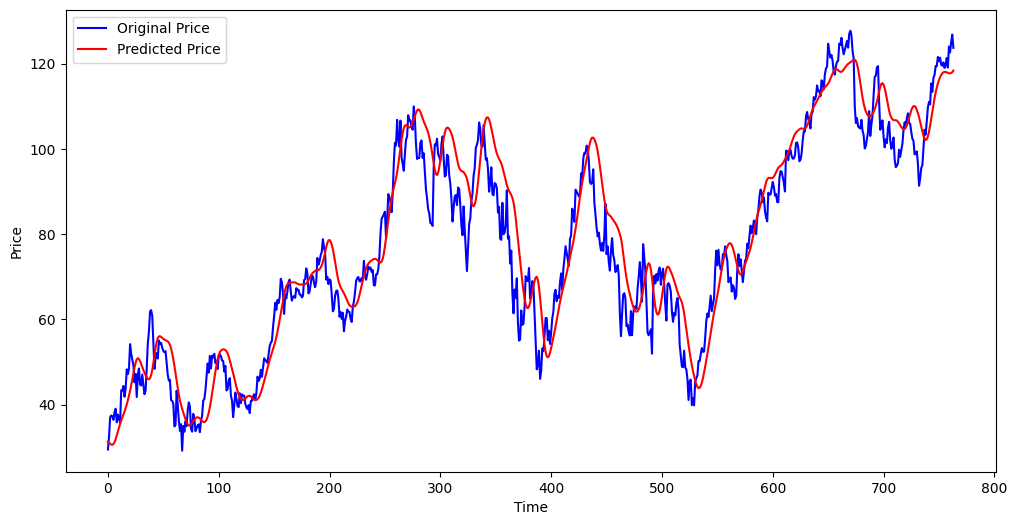

In [109]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label ='Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price' )
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()